In [1]:
import sys
sys.path.append("/usr/local/lib/python3.9/site-packages")
#sys.path.append("/Users/paultatasciore/Library/Python/3.9/lib/python/site-packages")
from scipy import optimize
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [2]:
def f(z):
    return (z**3 - 1)

def deriv(z):
    return 3*(z**2)

In [3]:
I=np.random.uniform(-1,1,(1000,2))

x=np.linspace(-1,1,100)
y=np.linspace(-1,1,100)             
TI=np.array(np.meshgrid(x,y)).T.reshape(-1,2)

root = np.array([])
root2 = np.array([])

for i in range(len(I)):
    root = np.append(root, optimize.newton(f, x0=complex(I[i,0],I[i,1]), fprime=deriv, tol=.001))

for i in range(len(TI)):
    root2 = np.append(root2, optimize.newton(f, x0=complex(TI[i,0],TI[i,1]), fprime=deriv, tol=.001))


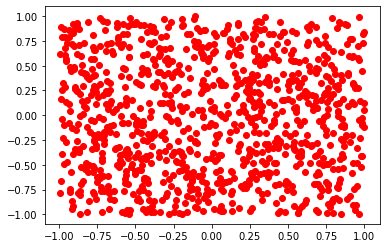

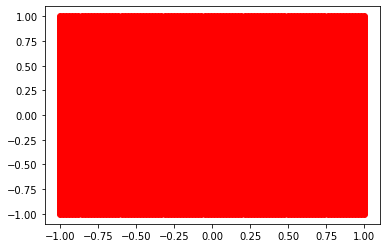

In [4]:
plt.scatter(I[:,0],I[:,1], c='red')
plt.figure()
plt.scatter(TI[:,0],TI[:,1], c='red')


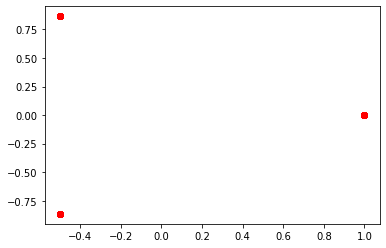

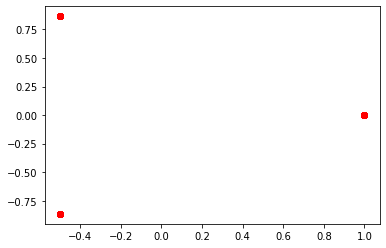

In [5]:
plt.scatter(root[:].real,root[:].imag, c='red')
plt.figure()
plt.scatter(root2[:].real,root2[:].imag, c='red')


In [6]:
P = I
output = np.array([root[:].real,root[:].imag]).T

T = TI
output2 = np.array([root2[:].real,root2[:].imag]).T


In [7]:
print(P.shape)
print(T.shape)

(1000, 2)
(10000, 2)


In [8]:
print(output)
print(output2)

[[-5.00000000e-01 -8.66025404e-01]
 [-5.00000000e-01  8.66025404e-01]
 [-5.00000000e-01 -8.66025409e-01]
 ...
 [ 1.00000004e+00  1.82955760e-08]
 [-5.00000000e-01  8.66025404e-01]
 [ 1.00000000e+00 -2.29911117e-11]]
[[-4.99999911e-01 -8.66024903e-01]
 [-4.99999686e-01 -8.66025003e-01]
 [-4.99999520e-01 -8.66025196e-01]
 ...
 [ 9.99999999e-01  5.73966368e-10]
 [ 1.00000000e+00  3.51072267e-09]
 [ 1.00000001e+00 -2.55681329e-08]]


In [9]:
#O = np.array([])
#for i in range(len(output)):
#    if output[i,0]>0:
#        O = np.append(O, 0)
#    else:
#        if output[i,1]>0:
#            O = np.append(O, 1)
#        else:
#            O = np.append(O, -1)
            
#TO = np.array([])
#for i in range(len(output2)):
#    if output2[i,0]>0:
#        TO = np.append(TO, 0)
#    else:
#        if output2[i,1]>0:
#            TO = np.append(TO, 1)
#        else:
#            TO = np.append(TO, -1)

r = .25

O = np.array([])
for i in range(len(output)):
    if ((output[i,0] - 1)**2 + (output[i,1] - 0)**2 < r):
        O = np.append(O, 0)
    elif (output[i,0] + 0.5)**2 + (output[i,1] - (np.sqrt(3)/2))**2 < r:
        O = np.append(O, 1)
    elif ((output[i,0] + 0.5)**2 + (output[i,1] + (np.sqrt(3)/2))**2 < r):
        O = np.append(O, -1)
    else:
        O = np.append(O, 2)

TO = np.array([])
for i in range(len(output2)):
    if ((output2[i,0] - 1)**2 + (output2[i,1] - 0)**2 < r):
        TO = np.append(TO, 0)
    elif (output2[i,0] + 0.5)**2 + (output2[i,1] - (np.sqrt(3)/2))**2 < r:
        TO = np.append(TO, 1)
    elif ((output2[i,0] + 0.5)**2 + (output2[i,1] + (np.sqrt(3)/2))**2 < r):
        TO = np.append(TO, -1)
    else:
        TO = np.append(TO, 2)
        

In [10]:
data_fname = np.hstack([P, np.expand_dims(O, axis=1)])
data = pd.DataFrame(data_fname)

In [11]:
data

,0,1,2
0,-0.704682,-0.763137,-1.0
1,0.788517,0.981985,1.0
2,0.756945,-0.981214,-1.0
3,0.641818,-0.479169,0.0
4,0.527015,0.410471,0.0
...,...,...,...
995,-0.343801,0.601725,1.0
996,0.501886,0.164279,0.0
997,0.996708,-0.120265,0.0
998,-0.319677,0.308131,1.0


In [12]:
X = np.array(data.iloc[:, :-1])
y = np.array(data.iloc[:, -1:])[:,0]

In [13]:
X

array([[-0.70468202, -0.76313716],
       [ 0.78851738,  0.98198493],
       [ 0.75694526, -0.9812136 ],
       ...,
       [ 0.99670767, -0.12026453],
       [-0.31967721,  0.30813111],
       [ 0.67721518,  0.19622216]])

In [14]:
y

array([-1.,  1., -1.,  0.,  0.,  0.,  0.,  1.,  0., -1.,  1., -1., -1.,
        0.,  1.,  0., -1.,  0.,  1.,  1., -1.,  1., -1., -1.,  0., -1.,
        0., -1.,  0., -1.,  1.,  0.,  0.,  1.,  1.,  1., -1.,  0.,  0.,
        0.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  0.,
       -1.,  1.,  0.,  1.,  0.,  0., -1., -1.,  1., -1., -1.,  0.,  1.,
       -1.,  1.,  0., -1., -1.,  1.,  0.,  1., -1.,  0.,  0.,  1.,  0.,
       -1.,  0.,  1., -1.,  1.,  0.,  0.,  1., -1.,  1.,  0.,  0., -1.,
        1., -1.,  0.,  0.,  1.,  0., -1.,  0.,  1., -1., -1.,  0.,  0.,
        1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  0., -1.,  1., -1.,  0.,
        1.,  0.,  0., -1., -1., -1.,  1.,  1.,  1.,  0., -1.,  0.,  1.,
        1., -1.,  1.,  0.,  0.,  0., -1., -1.,  1., -1.,  0.,  1.,  0.,
        0.,  0.,  0., -1.,  0., -1.,  0., -1., -1., -1.,  1., -1.,  0.,
       -1., -1.,  1.,  1.,  0., -1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,
        1.,  1.,  1., -1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Score on predictor test set: 0.925
[[67  4  5]
 [ 1 54  2]
 [ 1  2 64]]
Score on test set: 0.9052
[[2859  193  271]
 [  61 3119  174]
 [  54  195 3074]]
125
10000
1.25


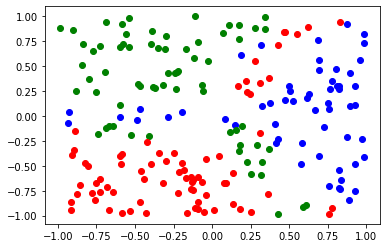

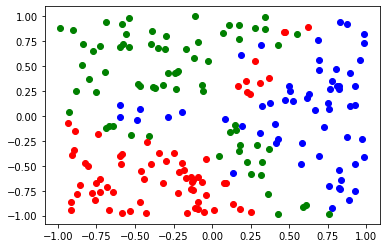

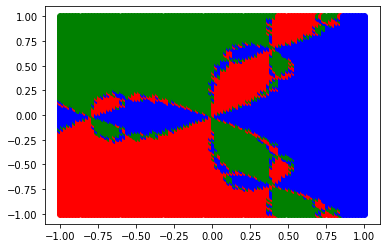

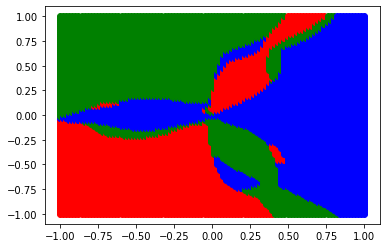

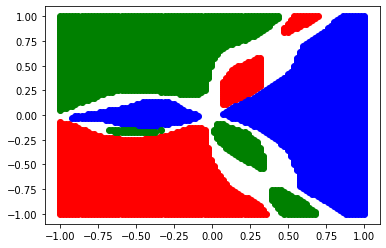

In [16]:
#MLP Classifier

model = MLPClassifier(hidden_layer_sizes=(100,100,100,100), activation='relu', learning_rate_init=0.001, max_iter=1000)

model.fit(X_train, y_train);

score = model.score(X_test, y_test)

print("Score on predictor test set:", score)

print(confusion_matrix(y_test, model.predict(X_test)))

# Actual
for i in range(len(y_test)):
    if y_test[i]==-1:
        plt.scatter(X_test[i,0],X_test[i,1], c='red')
    if y_test[i]==1:
        plt.scatter(X_test[i,0],X_test[i,1], c='green')
    if y_test[i]==0:
        plt.scatter(X_test[i,0],X_test[i,1], c='blue')
    if y_test[i]==2:
        plt.scatter(X_test[i,0],X_test[i,1], c='black')
plt.figure()

# Model 
for i in range(len(model.predict_proba(X_test)[:,0])):
    if model.predict(X_test)[i]==-1:
        plt.scatter(X_test[i,0],X_test[i,1], c='red')
    if model.predict(X_test)[i]==1:
        plt.scatter(X_test[i,0],X_test[i,1], c='green')
    if model.predict(X_test)[i]==0:
        plt.scatter(X_test[i,0],X_test[i,1], c='blue')
    if model.predict(X_test)[i]==2:
        plt.scatter(X_test[i,0],X_test[i,1], c='black')
plt.figure()

score = model.score(T, TO)

print("Score on test set:", score)

print(confusion_matrix(TO, model.predict(T)))

# Actual
for i in range(len(TO)):
    if TO[i]==-1:
        plt.scatter(T[i,0],T[i,1], c='red')
    if TO[i]==1:
        plt.scatter(T[i,0],T[i,1], c='green')    
    if TO[i]==0:
        plt.scatter(T[i,0],T[i,1], c='blue')
    if TO[i]==2:
        plt.scatter(T[i,0],T[i,1], c='black')
plt.figure()

# Model 
for i in range(len(model.predict_proba(T)[:,0])):
    if model.predict(T)[i]==-1:
        plt.scatter(T[i,0],T[i,1], c='red')
    if model.predict(T)[i]==1:
        plt.scatter(T[i,0],T[i,1], c='green')
    if model.predict(T)[i]==0:
        plt.scatter(T[i,0],T[i,1], c='blue')
    if model.predict(T)[i]==2:
        plt.scatter(T[i,0],T[i,1], c='black')       
    
p=0.9
c0=model.predict_proba(T)[:,0]
c1=model.predict_proba(T)[:,1]
c2=model.predict_proba(T)[:,2]

I=np.argwhere(c0>p)
J=np.argwhere(c1>p)
K=np.argwhere(c2>p)

plt.figure()
plt.scatter(T[I,0],T[I,1], c='red')
plt.scatter(T[J,0],T[J,1], c='blue')
plt.scatter(T[K,0],T[K,1], c='green')

if len(model.predict_proba(T)[0])>3:
    c3=model.predict_proba(T)[:,3]
    L=np.argwhere(c3>p)
    plt.scatter(T[L,0],T[L,1], c='black')

num_wrong = np.count_nonzero(model.predict(T)[I]-TO[I]) + np.count_nonzero(model.predict(T)[J]-TO[J]) + np.count_nonzero(model.predict(T)[K]-TO[K])

if len(model.predict_proba(T)[0])>3:
    num_wrong += np.count_nonzero(model.predict(T)[L]-TO[L]) 

print(num_wrong)
print(len(TO))
print((num_wrong/len(TO)) * 100)

In [17]:
p=0.9
c0=model.predict_proba(T)[:,0]
c1=model.predict_proba(T)[:,1]
c2=model.predict_proba(T)[:,2]

I=np.argwhere(c0>p)
J=np.argwhere(c1>p)
K=np.argwhere(c2>p)


if len(model.predict_proba(T)[0])>3:
    c3=model.predict_proba(T)[:,3]
    L=np.argwhere(c3>p)

num_wrong = np.count_nonzero(model.predict(T)[I]-TO[I]) + np.count_nonzero(model.predict(T)[J]-TO[J]) + np.count_nonzero(model.predict(T)[K]-TO[K])

if len(model.predict_proba(T)[0])>3:
    num_wrong += np.count_nonzero(model.predict(T)[L]-TO[L]) 

print(num_wrong)
print(len(TO))
print((num_wrong/len(TO)) * 100)

8
900
0.8888888888888888


In [18]:
np.intersect1d(np.intersect1d(I,J),K)

array([], dtype=int64)